# **Real Estate Price Prediction**


# **Table of Contents**
* [1.Introduction](#1)
* [2.Import Libraries](#2)
* [3.Load and Split Data](#3)
* [4.Data Understanding](#4)
* [5.Data Preparation](#5)
  * [Handling the missing values](#6)
  * [Convert type of attributes](#7)
  * [Preprocessing Data](#8)
* [6. Report: Pandas profiling](#6)
* [7. Export](#7)


## - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

<a id="1"></a> <br>
# **1. Introduction**

The dataset we'll be analyzing is the dataset which is scrapped from Immoweb.be in Belgium. It shows the information of each house and appartement to sale. This dataset has 52.077 rows and 20 columns.

#### **Attributes:**
The metadata of the columns:

* **"locality":** Postal code of the house/apartment.
* **"type_of_property":** Type of property (house or apartment).
* **"subtype_of_property":** Specific subtype of the property (e.g., house/villa/farmhouse/...).
* **"price":** Price of the property (euros).
* **"type_of_sale":** Type of sale (e.g., "for sale").
* **"number_of_rooms":** Number of rooms in the property.
* **"house_area":** Area of the house/apartment.
* **"fully_equipped_kitchen":** Boolean field indicating if the property has a fully equipped kitchen (1 for yes, 0 for no).
* **"open_fire":** Boolean field indicating if the property has an open fire (1 for yes, 0 for no).
* **"terrace":** Boolean field indicating if the property has a terrace (1 for yes, 0 for no).
* **"terrace_area":** Area of the terrace.
* **"garden":** Boolean field indicating if the property has a garden (1 for yes, 0 for no).
* **"garden_area":** Area of the garden.
* **"surface_of_the_land":** Surface area of the land.
* **"surface_of_the_plot_of_land":** Surface area of the plot of land.
* **"number_of_facades":** Number of facades of the property.
* **"swimming_pool":** Boolean field indicating if the property has a swimming pool (1 for yes, 0 for no).
* **"state_of_the_building":** State of the building (as new/good/to be done up/to renovate/just renovated/to restore).
* **"construction_year":** Year of construction.


But in this dataset, we don't have the information related longitude and lattitude of each city. So we use also the [zipcode data of Belgium](https://github.com/kaiyungtan/Real-Estate-data-analysis/tree/master/data/raw). 

## - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

<a id="2"></a> <br>
# **2. Imports**

In [1]:
# Load data libraries
import pandas as pd

# For visualizations
import matplotlib.pyplot as plt
import seaborn as sns

## - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

<a id="3"></a> <br>
# **3. Load and Split the Data**

In [2]:
# First, let's load the data
df = pd.read_csv("../data/raw/dataset_house_apartment.csv")

df.head()

locality type_of_property   subtype_of_property   price type_of_sale  \
0      1050            house                 house  340000     for sale   
1      1880            house                 villa  525000     for sale   
2      4900            house  exceptional property  550000     for sale   
3      7912            house                 villa  550000     for sale   
4      6032            house                 house  550000     for sale   

   number_of_rooms  house_area  fully_equipped_kitchen  furnished  open_fire  \
0              6.0       203.0                       1        NaN          0   
1              6.0       250.0                       1        NaN          0   
2             11.0       475.0                       1        NaN          0   
3              4.0       325.0                       1        NaN          0   
4              5.0       400.0                       1        NaN          0   

   terrace  terrace_area  garden  garden_area  surface_of_the_land  \
0        1           NaN       0          NaN                 95.0   
1        1          40.0       1        430.0                826.0   
2        1           NaN       1       1400.0               1543.0   
3        1         125.0       1       2333.0               3570.0   
4        1          80.0       1        500.0                616.0   

   surface_of_the_plot_of_land  number_of_facades  swimming_pool  \
0                          NaN                2.0              0   
1                          NaN                4.0              0   
2                          NaN                4.0              0   
3                          NaN                4.0              0   
4                          NaN                3.0              0   

  state_of_the_building  construction_year  
0         to be done up             1901.0  
1                as new             1992.0  
2                  good             1853.0  
3                  good             1918.0  
4                as new             1977.0

In [3]:
df.shape

(52077, 20)

In [4]:
# Load zipcode data of Belgium
zipcode = pd.read_csv("../data/raw/code-postaux-belge.csv", sep=";")

In [5]:
# Drop empty columns
zipcode.drop(columns=["coordonnees", "geom"], inplace=True)

# Rename the columns
zipcode.rename(
    columns={
        "column_1": "locality",
        "column_2": "city_name",
        "column_3": "lattitude",
        "column_4": "longitude",
    },
    inplace=True,
)

# Drop the localities' duplicates
zipcode.drop_duplicates(subset=["locality"], inplace=True)

In [6]:
zipcode.shape

(1145, 4)

In [7]:
zipcode.head()

locality             city_name  lattitude  longitude
0      1060          Saint-Gilles   4.345668  50.826741
1      1080  Molenbeek-Saint-Jean   4.322778  50.854355
2      1083             Ganshoren   4.317510  50.871240
3      1120   Neder-Over-Heembeek   4.390489  50.897796
4      1300                 Wavre   4.607744  50.716419

Merge real estate data and zipcode data

In [8]:
df = pd.merge(df, zipcode, on=["locality"], how="inner")

In [9]:
df.shape

(52076, 23)

In [10]:
df.head(5)

locality type_of_property subtype_of_property     price type_of_sale  \
0      1050            house               house    340000     for sale   
1      1050            house  mixed use building    520000     for sale   
2      1050            house               house  no price     for sale   
3      1050            house               house    599000     for sale   
4      1050            house               house    599000     for sale   

   number_of_rooms  house_area  fully_equipped_kitchen  furnished  open_fire  \
0              6.0       203.0                       1        NaN          0   
1              4.0       200.0                       0        NaN          0   
2              6.0         NaN                       1        NaN          0   
3              4.0       160.0                       1        NaN          0   
4              3.0       160.0                       1        NaN          0   

   ...  garden_area  surface_of_the_land  surface_of_the_plot_of_land  \
0  ...          NaN                 95.0                          NaN   
1  ...          NaN                 69.0                          NaN   
2  ...          NaN                  0.0                          NaN   
3  ...         55.0                100.0                          NaN   
4  ...         60.0                130.0                          NaN   

   number_of_facades  swimming_pool  state_of_the_building  construction_year  \
0                2.0              0          to be done up             1901.0   
1                2.0              0            to renovate             1940.0   
2                NaN              0                    NaN             1910.0   
3                2.0              0          to be done up             1898.0   
4                2.0              0                   good             1953.0   

   city_name lattitude  longitude  
0    Ixelles  4.381571  50.822285  
1    Ixelles  4.381571  50.822285  
2    Ixelles  4.381571  50.822285  
3    Ixelles  4.381571  50.822285  
4    Ixelles  4.381571  50.822285  

[5 rows x 23 columns]

## - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

<a id="4"></a> <br>
# **4. Data Understanding**

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52076 entries, 0 to 52075
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   locality                     52076 non-null  int64  
 1   type_of_property             52076 non-null  object 
 2   subtype_of_property          52076 non-null  object 
 3   price                        52076 non-null  object 
 4   type_of_sale                 52076 non-null  object 
 5   number_of_rooms              52074 non-null  float64
 6   house_area                   43444 non-null  float64
 7   fully_equipped_kitchen       52076 non-null  int64  
 8   furnished                    0 non-null      float64
 9   open_fire                    52076 non-null  int64  
 10  terrace                      52076 non-null  int64  
 11  terrace_area                 17518 non-null  float64
 12  garden                       52076 non-null  int64  
 13  garden_area     

Check number of duplicated rows in data and drop these rows

In [12]:
df.duplicated().sum()

1235

In [13]:
df.drop_duplicates(inplace=True)

In [14]:
# rename columns name 'locality' to 'postal_code'

df.rename(columns={"locality": "postal_code"}, inplace=True)

In [15]:
# Drop columns with only 1 unique value
df.drop(
    columns=[
        "type_of_sale",
        "furnished",
        "surface_of_the_plot_of_land",
        "subtype_of_property",
    ],
    inplace=True,
)
df.shape

(50841, 19)

In [16]:
df.describe()
df.shape

(50841, 19)

Check misisng values in data

In [17]:
df.isnull().sum()

postal_code                   0
type_of_property              0
price                         0
number_of_rooms               2
house_area                 8430
fully_equipped_kitchen        0
open_fire                     0
terrace                       0
terrace_area              33745
garden                        0
garden_area               42491
surface_of_the_land       21840
number_of_facades         13106
swimming_pool                 0
state_of_the_building     13171
construction_year         20958
city_name                     0
lattitude                     0
longitude                     0
dtype: int64

In [18]:
def display_only_missing(df):
    all_data_na = (df.isnull().sum() / len(df)) * 100
    all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(
        ascending=False
    )
    missing_data = pd.DataFrame({"Missing Ratio": all_data_na})
    print(missing_data)

In [19]:
print("Percentage Missing Value %")
display_only_missing(df)

Percentage Missing Value %
                       Missing Ratio
garden_area                83.576248
terrace_area               66.373596
surface_of_the_land        42.957456
construction_year          41.222635
state_of_the_building      25.906257
number_of_facades          25.778407
house_area                 16.581106
number_of_rooms             0.003934


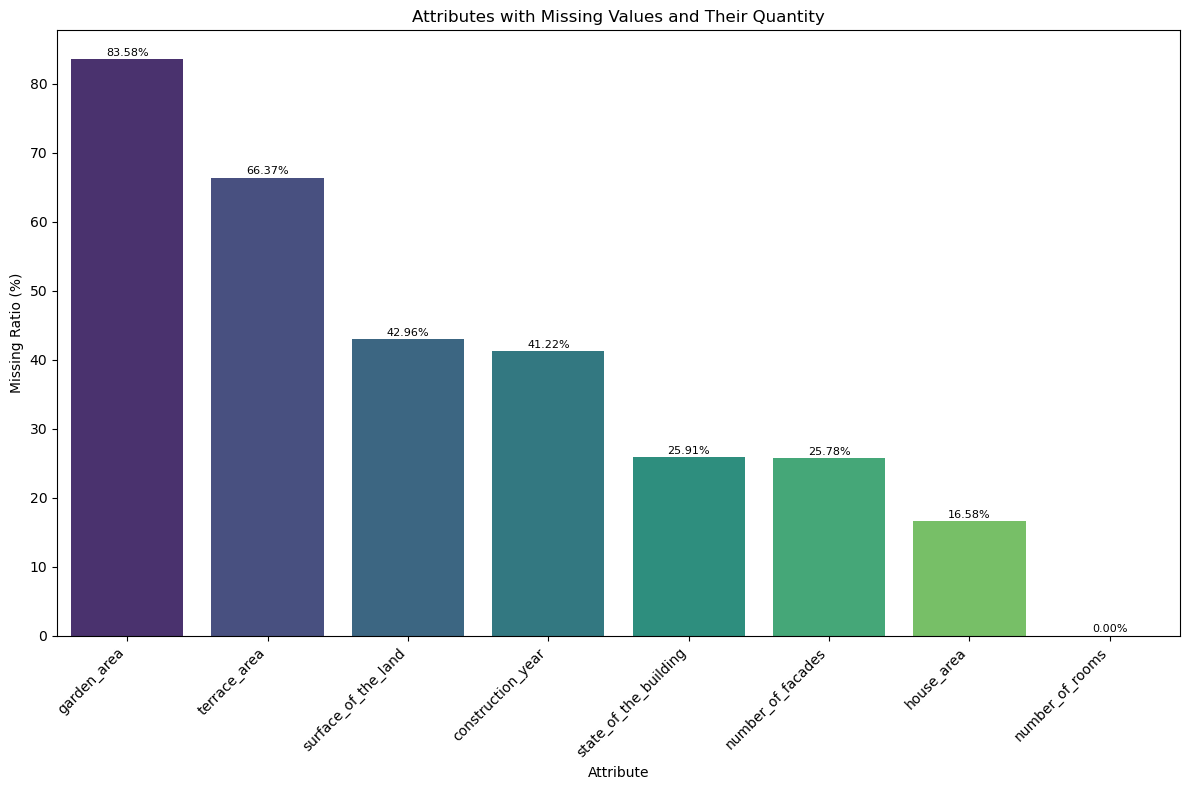

In [20]:
# Calculate the missing ratio for each attribute
missing_ratio = (df.isnull().sum() / len(df)) * 100

# Create a DataFrame to store the missing values information
missing_data = pd.DataFrame({"Attribute": df.columns, "MissingRatio": missing_ratio})
missing_data = missing_data[missing_data["MissingRatio"] > 0].sort_values(
    by="MissingRatio", ascending=False
)

# Plot the missing values with values at the top of each bar
plt.figure(figsize=(12, 8))
barplot = sns.barplot(
    x="Attribute", y="MissingRatio", data=missing_data, palette="viridis"
)

# Add values at the top of each bar
for index, value in enumerate(missing_data["MissingRatio"]):
    barplot.text(
        index,
        value + 0.2,
        f"{value:.2f}%",
        ha="center",
        va="bottom",
        fontsize=8,
        color="black",
    )

plt.title("Attributes with Missing Values and Their Quantity")
plt.xlabel("Attribute")
plt.ylabel("Missing Ratio (%)")
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

## - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

<a id="5"></a> <br>
# **5. Data Preparation**

<a id="5.1"></a> 
### **Handling the missing values**

We will drop the attributes with too many null values. Namely, "garden_area", "terrace_area".

In [21]:
df.drop(columns=["garden_area", "terrace_area", "construction_year"], inplace=True)
df.shape

(50841, 16)

Fill missing value as "None" for "surface_of_the_land" attribute and impute missing values of the "surface_of_the_land" attribute by replacing "None" values by 0.

In [22]:
df.surface_of_the_land = df.surface_of_the_land.fillna("None")

In [23]:
# Replace 'None' by 0
df["surface_of_the_land"] = df["surface_of_the_land"].replace({"None": 0}).astype(int)

df.surface_of_the_land.value_counts()

surface_of_the_land
0        25132
150        216
100        212
200        212
250        189
         ...  
18323        1
32694        1
6974         1
6600         1
6520         1
Name: count, Length: 3278, dtype: int64

In [24]:
df.isnull().sum()

postal_code                   0
type_of_property              0
price                         0
number_of_rooms               2
house_area                 8430
fully_equipped_kitchen        0
open_fire                     0
terrace                       0
garden                        0
surface_of_the_land           0
number_of_facades         13106
swimming_pool                 0
state_of_the_building     13171
city_name                     0
lattitude                     0
longitude                     0
dtype: int64

With "state_of_the_building" attribute, we replace "None" values by "unknown".

In [25]:
df["state_of_the_building"] = df["state_of_the_building"].fillna("unknown")

df["state_of_the_building"].value_counts()

state_of_the_building
as new            14358
good              13457
unknown           13171
to be done up      3670
to renovate        3392
just renovated     2577
to restore          216
Name: count, dtype: int64

For "number_of_facades" attribute, we replace the "None" values by 0.

In [26]:
df.number_of_facades.value_counts()

number_of_facades
2.0    17834
4.0    10092
3.0     9305
1.0      504
Name: count, dtype: int64

In [27]:
df.number_of_facades = df.number_of_facades.fillna("None")
df["number_of_facades"] = df["number_of_facades"].replace({"None": 0}).astype(int)

df.number_of_facades.value_counts()

number_of_facades
2    17834
0    13106
4    10092
3     9305
1      504
Name: count, dtype: int64

For "house_area" attribute and "number_of_rooms" attribute, we choose to drop the rows with missing values.

In [28]:
df.dropna(subset=["house_area"], inplace=True)
df.house_area.value_counts()

house_area
90.0      908
120.0     900
100.0     895
150.0     840
140.0     774
         ... 
1254.0      1
1095.0      1
680.0       1
645.0       1
2019.0      1
Name: count, Length: 692, dtype: int64

In [29]:
# Delete the 1 and 31700 entries
df = df[(df["house_area"] != 1) & (df["house_area"] != 31700)]

In [30]:
df.dropna(subset=["number_of_rooms"], inplace=True)
# Remove number_of_rooms >= 20
df = df[(df["number_of_rooms"] < 20) & (df["number_of_rooms"] > 0)]
df.number_of_rooms.value_counts()

number_of_rooms
2.0     14078
3.0     13574
4.0      5944
1.0      4318
5.0      2151
6.0       889
7.0       280
8.0       144
9.0        63
10.0       57
11.0       28
12.0       21
16.0        6
14.0        6
15.0        5
18.0        4
13.0        4
Name: count, dtype: int64

The "price" attribute contains rows with the value "no price" and we calculate the number of theses rows and remove the.

In [31]:
num_rows_with_no_price = (df["price"] == "no price").sum()

print(f"Number of rows with 'no price': {num_rows_with_no_price}")

df = df[df["price"] != "no price"]

Number of rows with 'no price': 44


In [32]:
df.isnull().sum()

postal_code               0
type_of_property          0
price                     0
number_of_rooms           0
house_area                0
fully_equipped_kitchen    0
open_fire                 0
terrace                   0
garden                    0
surface_of_the_land       0
number_of_facades         0
swimming_pool             0
state_of_the_building     0
city_name                 0
lattitude                 0
longitude                 0
dtype: int64

<a id="5.2"></a> 
### **Convert type of attributes**

For "type_of_property" attribute, we have a categorical variable like type_of_property with two categories (in this case, "house" and "apartment"), we can convert it to a numeric column by using binary encoding.

In [33]:
df["type_of_property"] = df["type_of_property"].replace({"house": 0, "apartment": 1})

Convert the data type of the "price", "number_of_rooms" and "house_area" attributes from object to integer.

In [34]:
df["price"] = df["price"].astype(int)
df["number_of_rooms"] = df["number_of_rooms"].astype(int)
df["house_area"] = df["house_area"].astype(int)

We have so 51532 instances with 23 different variables to work on.

## - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

<a id="6"></a> <br>
# **6. Report: Pandas profiling**

In [35]:
from pandas_profiling import ProfileReport

/tmp/ipykernel_85402/2274191625.py:1: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


In [36]:
profile = ProfileReport(
    df,
    title="Agriculture Data",
    dataset={
        "description": "This profiling report was generated for Real Estate dataset",
        "copyright_holder": "Thi Phan",
        "copyright_year": "2024",
        "url": "https://github.com/thiphan94/Real-Estate",
    },
)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [37]:
profile.to_file("Analysis.html")
profile.to_file("Analysis.json")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Render JSON:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

<a id="7"></a> <br>
# **7. Export**

In [38]:
df.reset_index(drop=True, inplace=True)
df.shape

df.to_csv("../data/clean/belgium_real_estate.csv")